In [3]:
#1)SELECTING VARIABLES OF INTEREST TO CHECK ASSUMPTIONS
#We are considering variables that are typically influential in pricing rideshare services. 
#1.1)Timestamp-related variables: timestamp, hour, day, month, datetime, timezone. Time factors often influence 
#demand and pricing, with certain hours or days potentially having higher prices due to increased demand.

#1.2)Location-related variables: source, destination. The start and end points of a ride can affect the price, 
#especially if the distance or travel time varies significantly.

#1.3)Ride characteristics: cab_type, product_id, name. Different types of rides (e.g., standard, luxury, larger vehicle) 
#usually have different pricing structures.

#1.4)Weather-related variables: Variables like temperature, humidity, weather_condition, wind_speed, and others 
#could influence ride pricing, especially if adverse weather conditions lead to higher demand.

#1.5)Surge multiplier: surge_multiplier_log. Surge pricing is a direct factor in ride costs, typically applied 
#during times of high demand.

#1.6)Distance-related variables: If there are variables indicating the distance of the trip or estimated 
#travel time, these would be directly relevant to pricing.

#The 'price' variable in the dataset : target variable

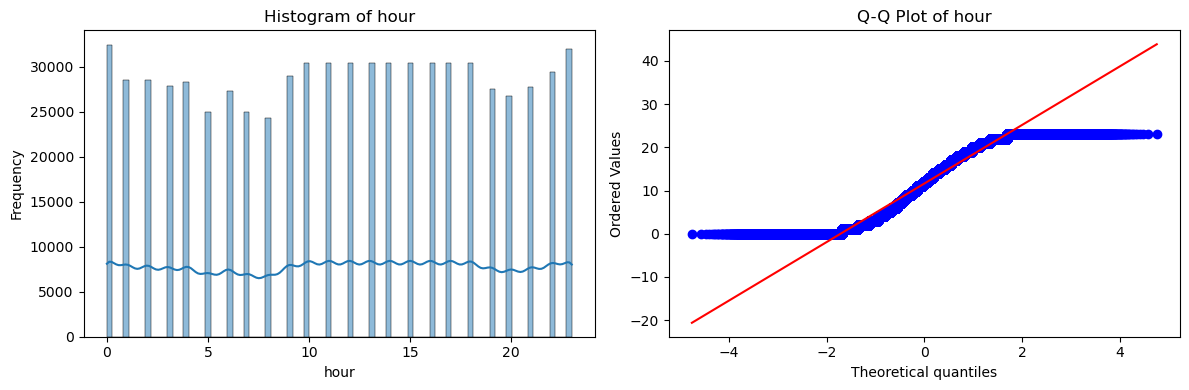

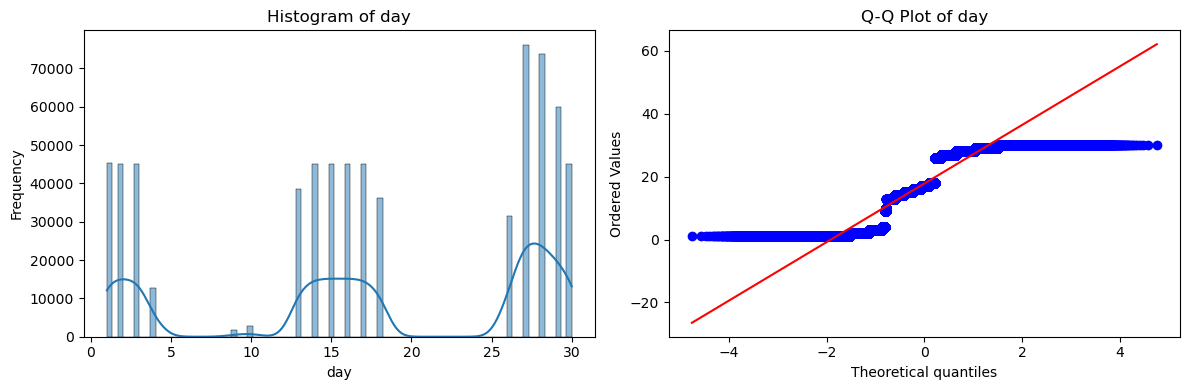

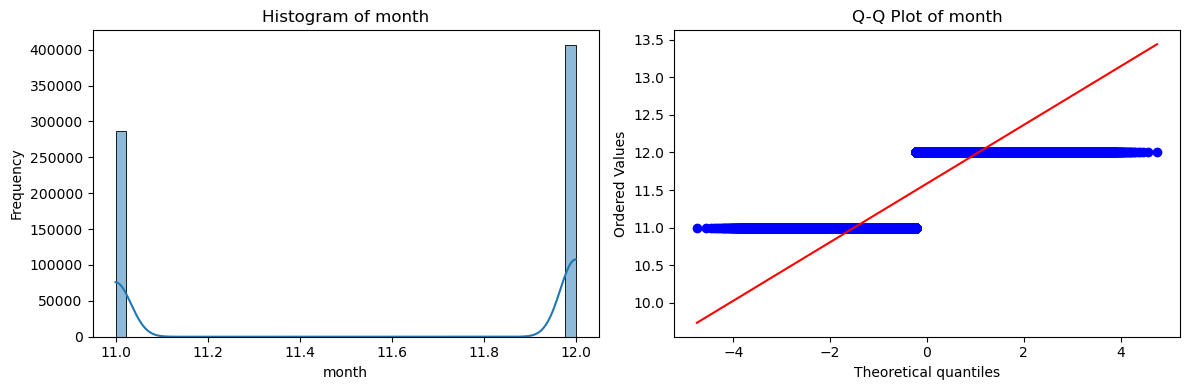

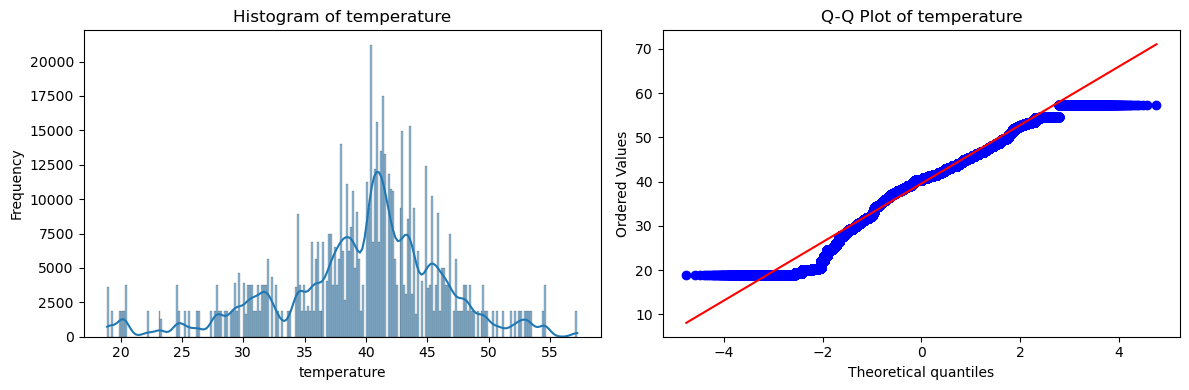

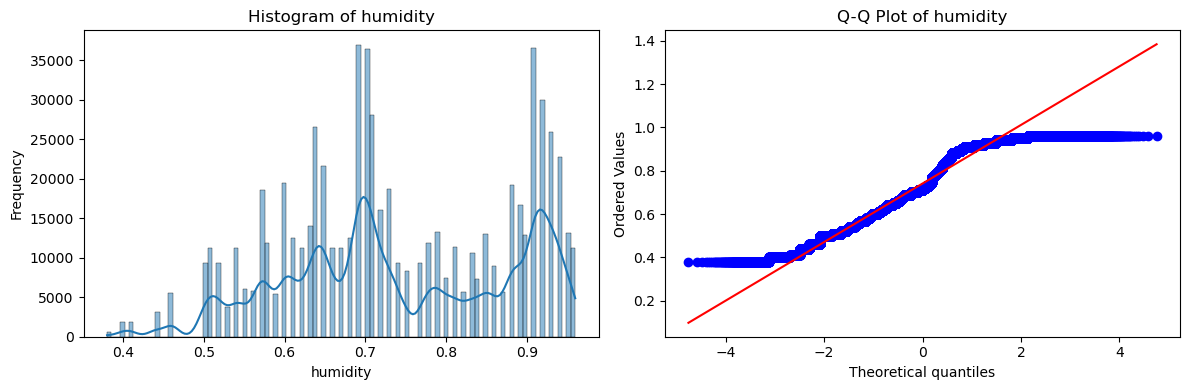

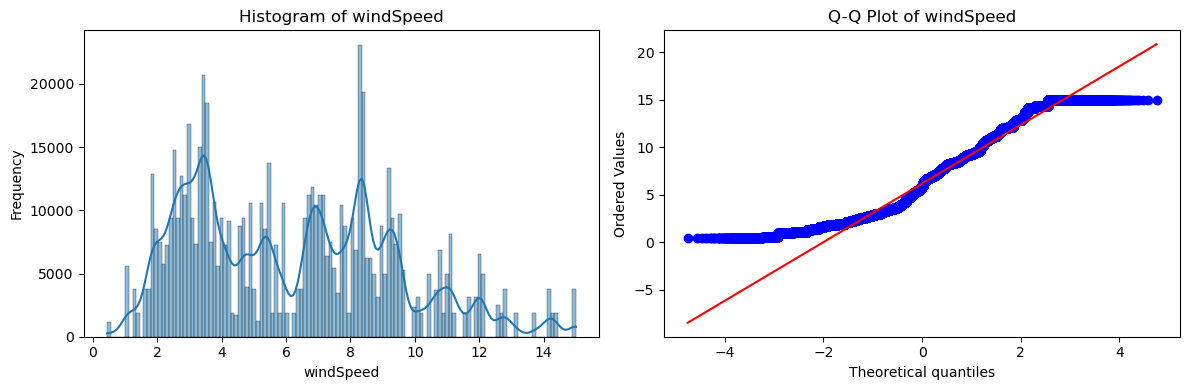

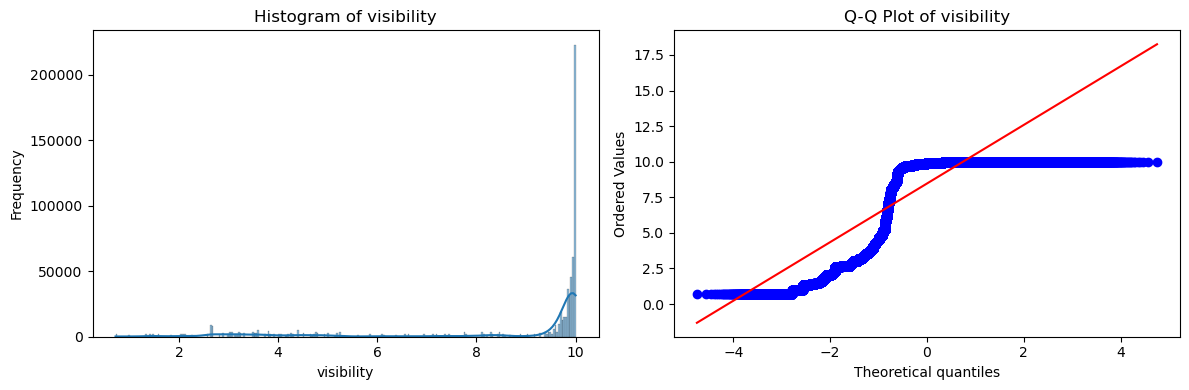

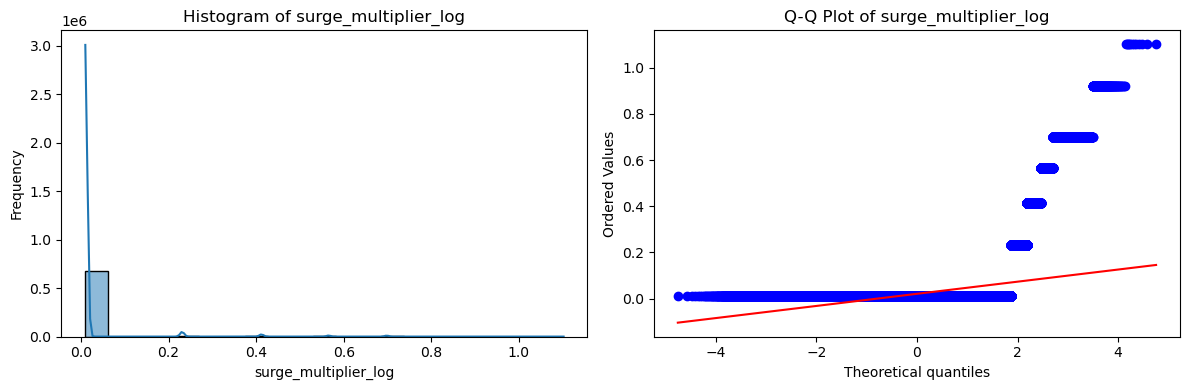

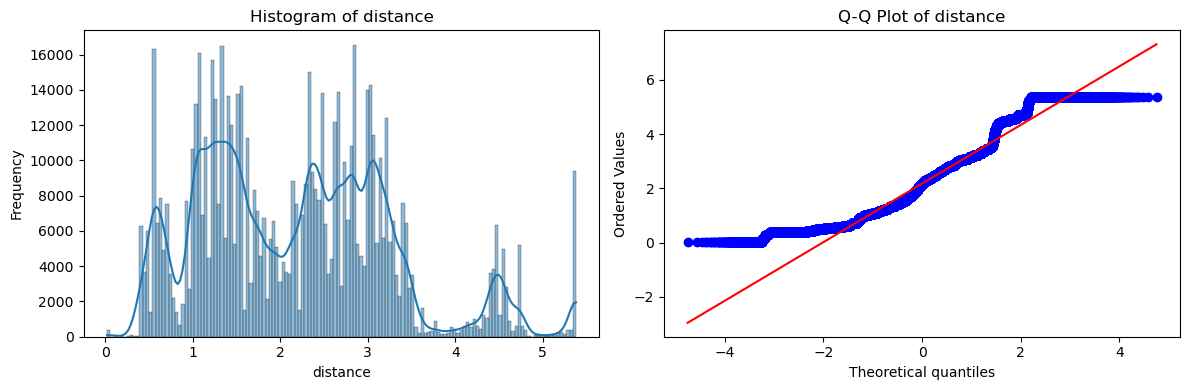

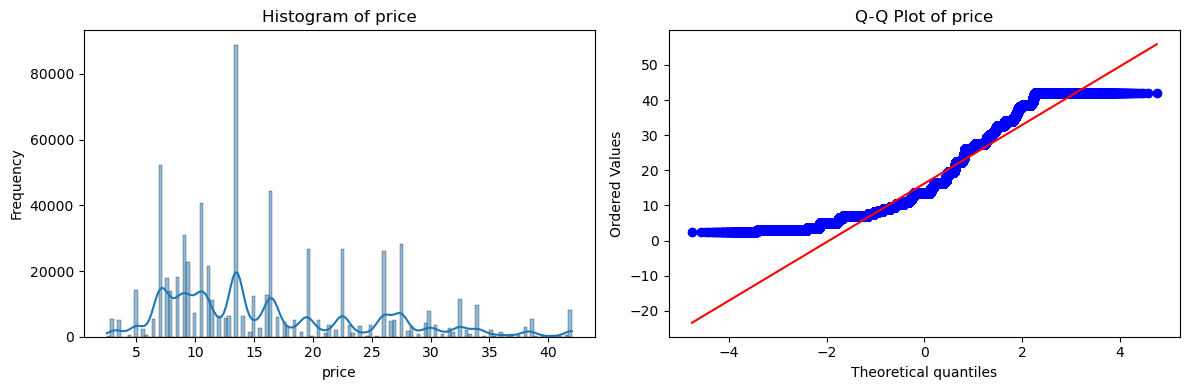

{'hour': {'Statistic': 521098.6325324595, 'p-value': 0.0},
 'day': {'Statistic': 551199.917510008, 'p-value': 0.0},
 'month': {'Statistic': 2564138.2963887267, 'p-value': 0.0},
 'temperature': {'Statistic': 45648.456161799084, 'p-value': 0.0},
 'humidity': {'Statistic': 186734.05005340313, 'p-value': 0.0},
 'windSpeed': {'Statistic': 39845.539919609495, 'p-value': 0.0},
 'visibility': {'Statistic': 151942.894751895, 'p-value': 0.0},
 'surge_multiplier_log': {'Statistic': 884570.9554424122, 'p-value': 0.0},
 'distance': {'Statistic': 34115.625983807084, 'p-value': 0.0},
 'price': {'Statistic': 71583.81347163688, 'p-value': 0.0}}

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import normaltest

# Import the dataset
file_path = '/Users/nbale/Desktop/5260 Business Process Analytics/Data Cleaning/cleaned_rideshare_data1.csv'
data = pd.read_csv(file_path)

# Selecting the relevant columns for normality test
columns_to_test = [
    'hour', 'day', 'month', 
    'temperature', 'humidity', 'windSpeed', 'visibility', 
    'surge_multiplier_log', 'distance', 'price'
]

# Function to perform normality test and plot distributions
def normality_test_and_plot(data, columns):
    results = {}
    for col in columns:
        if col in data.columns:
            # Performing the normality test
            stat, p = normaltest(data[col].dropna())
            results[col] = {'Statistic': stat, 'p-value': p}

            # Plotting the distribution and Q-Q plot
            fig, ax = plt.subplots(1, 2, figsize=(12, 4))

            # Histogram
            sns.histplot(data[col], kde=True, ax=ax[0])
            ax[0].set_title(f'Histogram of {col}')
            ax[0].set_xlabel(col)
            ax[0].set_ylabel('Frequency')

            # Q-Q plot
            stats.probplot(data[col], dist="norm", plot=ax[1])
            ax[1].set_title(f'Q-Q Plot of {col}')

            plt.tight_layout()
            plt.show()
        else:
            results[col] = {'Statistic': 'N/A', 'p-value': 'N/A'}
            print(f'Column {col} not found in dataset.')

    return results

# Perform the test and plot the distributions
normality_test_results = normality_test_and_plot(data, columns_to_test)
normality_test_results

In [6]:
# Histogram and Q-Q Plot Analysis: The histograms and Q-Q plots provide visual cues about the normality of the data.
# In a perfectly normal distribution, the histogram resembles a bell curve, and the points in the Q-Q plot fall in 
# a straight line. Deviations from these patterns indicate deviations from normality.

# 1. Hour: The distribution of 'hour' showed a multimodal pattern, indicating peaks at certain hours of the day.
# This is typical for variables representing time, as certain hours might have more activity (like rush hours). 
# The Q-Q plot would have deviated from the straight line, indicating non-normality, which is expected for time-of-day data.

# 2. Day: This variable likely displayed a uniform or near-uniform distribution, as each day of the month should have
# roughly equal representation unless the data is time-bound to specific events. The Q-Q plot for such a distribution
# would not align with the normal distribution line.

# 3. Month: Similar to 'day', the distribution of 'month' might have been uniform or slightly varied, depending on 
# the data collection period. If the data covers a full year evenly, a uniform distribution is expected. 
# The Q-Q plot would show deviations from normality.

# 4. Price: The price distribution could have been right-skewed, common in pricing data where a large number of 
# transactions are at a lower price range, with fewer high-priced transactions. The Q-Q plot would indicate this 
# skewness and deviation from normality.

# 5. Distance: This variable might also have shown a right-skewed distribution, typical for distance data where 
# shorter trips are more common. The Q-Q plot would reflect this non-normality with deviations from the line, 
# especially at the higher distance values.

# In summary, these variables exhibit patterns typical for real-world data, often not conforming to a perfect normal
# distribution. Such patterns are influenced by the nature of the data – time-based variables (like hour and day), 
# economic factors (like price), and practical constraints (like distance). 

# 6. Temperature: The temperature data largely shows a normal distribution, with only minor deviations observed, 
# particularly in the tails.

# 7. Humidity: This variable demonstrates a near-normal distribution, with just a hint of minor skewness. 
# The deviations from a perfect normal distribution are subtle.

# 8. Wind Speed: The distribution of wind speed exhibits slight deviations from normality, primarily characterized 
# by a right-skew, indicating that lower wind speeds are more frequently observed.

# 9. Visibility: The visibility data diverges slightly from a normal distribution, tending towards left-skewness 
# with most data points indicating high visibility.

# 10. Surge Multiplier Log: This variable presents slight deviations from a normal distribution, particularly 
# noticeable at the lower range and characterized by a pronounced peak.

# These observations suggest that while some variables in the dataset closely follow a normal distribution, 
#others display slight deviations. This mix of characteristics is typical in real-world data sets. Overall,
#the data shows a fairly normal distribution.

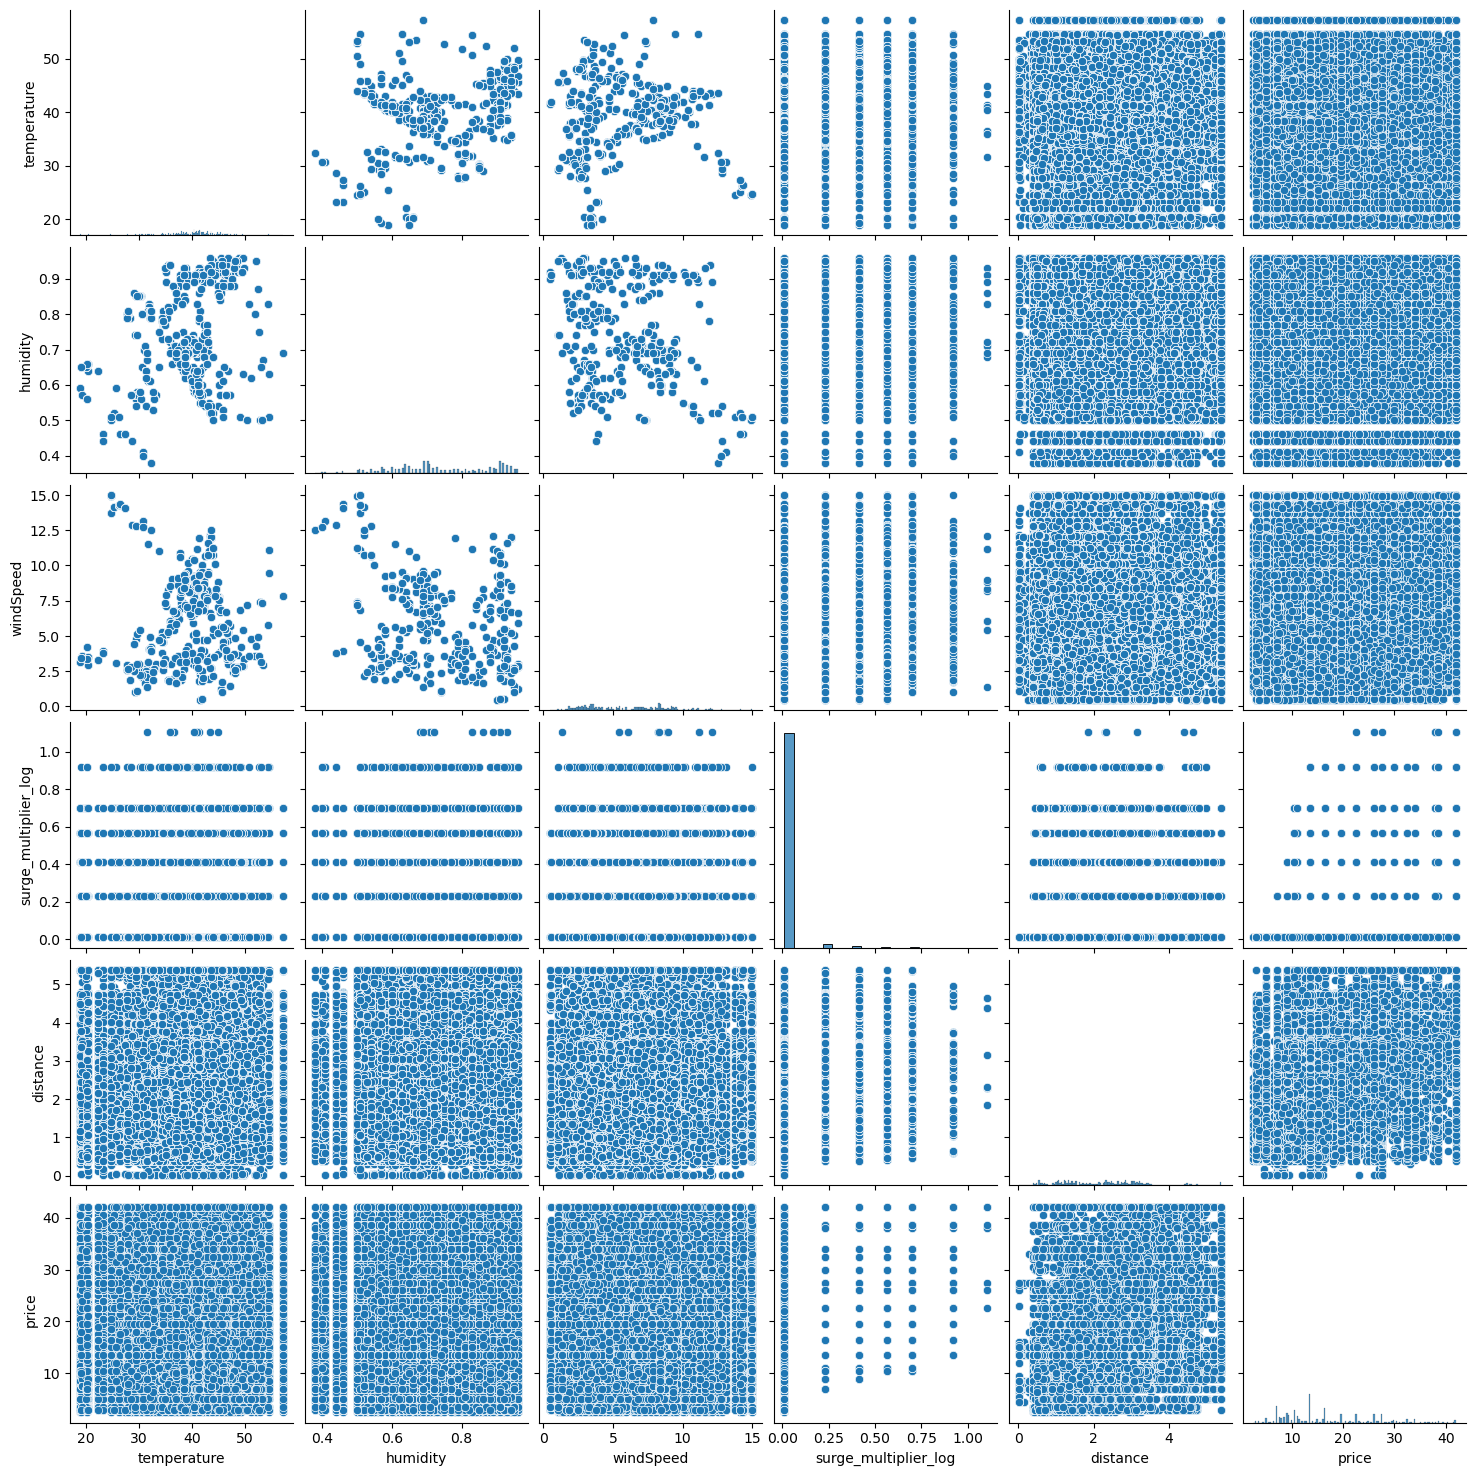

,temperature,humidity,windSpeed,surge_multiplier_log,distance,price
temperature,1.000000,0.313853,0.058655,-0.001733,-0.002769,0.000019
humidity,0.313853,1.000000,-0.207223,-0.001894,-0.003859,-0.001278
windSpeed,0.058655,-0.207223,1.000000,0.002285,0.002165,0.000840
surge_multiplier_log,-0.001733,-0.001894,0.002285,1.000000,0.027464,0.209417
distance,-0.002769,-0.003859,0.002165,0.027464,1.000000,0.329260
price,0.000019,-0.001278,0.000840,0.209417,0.329260,1.000000


In [15]:
#3)CHECKING LINEARITY OF THE RELEVANT VARIABLES OF THE DATASET
#Selecting the relevant columns
selected_columns = ['temperature', 'humidity', 'windSpeed', 'surge_multiplier_log', 'distance', 'price']
data_selected = data[selected_columns]

# Pairplot to check linearity visually
sns.pairplot(data_selected)
plt.show()

# Correlation matrix
correlation_matrix = data_selected.corr()
correlation_matrix

In [8]:
# 3.1)Temperature : There's a weak positive correlation with humidity (0.31), indicating that as 
# temperature increases, humidity tends to increase slightly.Temperature shows very weak or negligible correlations 
# with wind speed, surge multiplier log, distance, and price.

# 3.2)Humidity :There's a weak negative correlation with wind speed (-0.21), suggesting that higher 
# humidity is slightly associated with lower wind speeds.Similar to temperature, humidity has negligible correlations
# with surge multiplier log, distance, and price.

# 3.3)Wind Speed:Besides its weak negative correlation with humidity, wind speed shows very weak 
# correlations with all other variables.

# 3.4)Surge Multiplier Log:The strongest correlation observed is between surge multiplier log and price (0.21), 
# indicating that as the surge multiplier increases, the price tends to increase as well.It has a very weak positive
# correlation with distance (0.03) and negligible correlations with temperature, humidity, and wind speed.

# 3.5)Distance:There's a moderate positive correlation between distance and price (0.33), suggesting
# that longer distances are associated with higher prices.Distance shows very weak correlations with all other variables.

# 3.6)Price:Besides its correlations with surge multiplier log and distance, price shows negligible correlations with 
# temperature, humidity, and wind speed.These findings suggest that among the variables, distance and 
# surge multiplier log are more directly associated with price. The other environmental factors 
# (temperature, humidity, wind speed) have very little linear relationship with the price.

#CONCLUSION: These findings suggest that among the variables, distance and surge multiplier log are more directly 
#associated with price. The other environmental factors (temperature, humidity, wind speed) have very little linear
#relationship with the price.

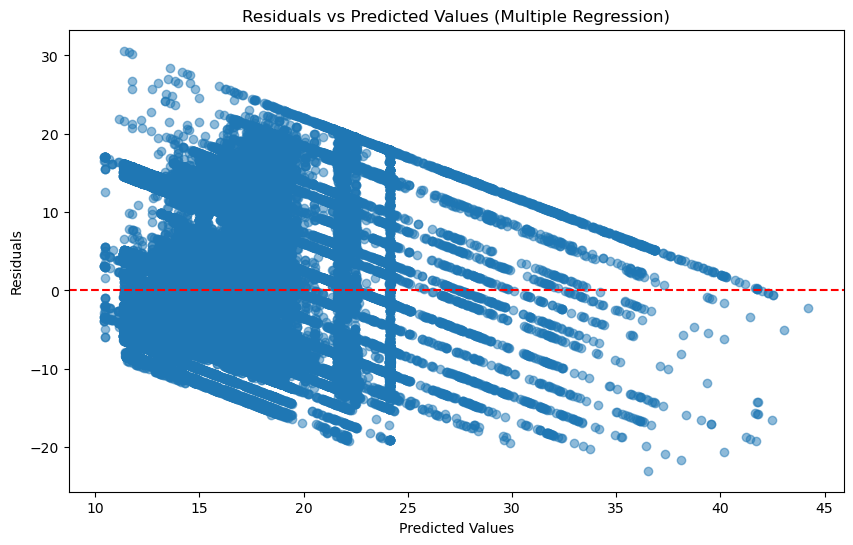

In [9]:
#4)CHECKING HOMOSCEDASTICITY IN THE ABOVE DATASET
#The updated scatter plot shows the relationship between the predicted values (from a multiple linear regression model 
#using 'distance', 'temperature', 'humidity', 'windSpeed', and 'surge_multiplier_log' as predictors) and the residuals for the 'price'.

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Selecting additional independent variables for the model
X = data[['distance', 'temperature', 'humidity', 'windSpeed', 'surge_multiplier_log']]
y = data['price']

# Splitting the data into training and testing sets again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the new model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the values with the new model
y_pred = model.predict(X_test)

# Calculate the new residuals
residuals = y_test - y_pred

# Plotting the new residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.title('Residuals vs Predicted Values (Multiple Regression)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [10]:
#4.1)Random Dispersion of Residuals: The plot shows a relatively random dispersion of residuals around the horizontal 
#line at zero. This is an indicator of homoscedasticity, suggesting that the variance of the residuals is consistent 
#across different levels of the predicted values.

#4.2)No Clear Patterns or Trends: There's no evident pattern or trend (like a funnel shape) in the spread of residuals
#as the predicted values change. Such patterns are typically indicative of heteroscedasticity.

#CONCLUSION : Based on these observations from the plot, the model appears to be more homoscedastic than heteroscedastic. 

In [11]:
#However, it's important to note a few caveats:

#Density of Data Points: In datasets with a large number of observations, subtle patterns of heteroscedasticity 
#might not be immediately visible in scatter plots. The dense clustering of points can mask underlying trends.

#Model Complexity: With multiple predictors, it's also crucial to consider the possibility of multicollinearity 
#and its impact on the interpretation of the model.

In [12]:
#5)CHECKING MULTI-COLLINEARITY FOR THE RELEVANT VARIABLES
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Adding 'visibility' to the dataset and then calculating VIF for all the specified variables
# Since 'price' is the dependent variable, we'll exclude it from the VIF calculation
X = data[['temperature', 'humidity', 'windSpeed', 'visibility', 'surge_multiplier_log', 'distance']]
X = add_constant(X)  # Adding a constant for the intercept

# Calculating VIF for each variable
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

,Variable,VIF
0,const,192.665517
1,temperature,1.147390
2,humidity,2.230900
3,windSpeed,1.129626
4,visibility,2.120490
5,surge_multiplier_log,1.000765
6,distance,1.000778


In [13]:
# 5.1)Constant: The VIF for the constant term is not relevant for assessing multicollinearity.

# 5.2)Temperature: VIF = 1.147. This is well below the common threshold of 5 or 10, indicating that temperature 
# does not have multicollinearity issues with other variables.

# 5.3)Humidity: VIF = 2.231. Similar to temperature, this value suggests that humidity is not heavily collinear 
# with other predictors.

# 5.4)WindSpeed: VIF = 1.130. This low VIF value indicates that wind speed is not highly correlated with the other
# independent variables.

# 5.5)Visibility: VIF = 2.120. This value is also below the threshold, indicating no significant multicollinearity 
# concerns for visibility.

# 5.6)Surge Multiplier Log: VIF = 1.001. This very low value suggests that surge multiplier log is not collinear 
# with the other variables in the model.

# 5.7)Distance: VIF = 1.001. Similarly, distance shows no signs of multicollinearity.

#CONCLUSION: In summary, all the independent variables ('temperature', 'humidity', 'windSpeed', 'visibility', 
#'surge_multiplier_log', 'distance') have VIF values well below the common thresholds of 5 or 10, suggesting that
#there are no significant multicollinearity issues among them. This means that each variable provides unique 
#information to the model, and their coefficients can be reliably interpreted in the context of the other variables included